Cuaderno por Fabián Quevedo, Camilo Rozo y Santiago Quintero.

In [3]:
### Useful packages
using DifferentialEquations
using Plots
using ForwardDiff
using Symbolics

# Búsqueda de raíces por homotopia y continuación

Para esta investigación sobre los métodos homotopicos para hallar raíces empezaremos por ejemplos en 1D y posteriormente sistemas fractales en 2D.

### Homotopias en una dimensión

#### Homotopia para aproximar el punto inicial de Newton

Como se detalla en el marco teórico del informe adjunto, una homotopia usual entre una función $f$ una $g$ es

$$ h(t,x)=tf(x)+(1-t)g(x). $$

En particual, si se busca la raíz de una función $f$ es posible usar $g(x)=f(x)-f(x_0)$, en dado caso la homotopia es 

$$ h(t,x)=f(x)+(t-1)f(x_0), $$

con $x_0$ algún punto en el dominio de $f$.
Teniendo en cuenta que si $h(t,x)=0$ tiene una raíz para cada $t\in[0,1]$, entonces esa raíz es functión de $t$, lo cual lo describimos con la curva $x(t)$; la cual va desde un punto conocido $x(0)$ hasta la solución de nuestro problema $x(1)$.
Si $h(t,x)$ y $x(t)$ son diferenciables, entonces la ecuación $h(t,x)=0$ derivada respecto a $t$ se convierte en 

$$ x'(t)=-[h_{x}(t,x(t))]^{-1}h_{t}(t,x(t)), $$ 

con la notación $\frac{\partial h }{\partial t}=h_t$ y $\frac{\partial h }{\partial x}=h_x$.

Si usamos la homotopia dada por $h(t,x)=f(x)+(t-1)f(x_0)$ entonces, $h_x=f'(x)$ y $h_t=f(x_0)$, es decir

$$ x'(t)=-[f'(x)]^{-1}f(x_0).$$

A partir de acá se debe resolver dicha ecuación diferencial por métodos numéricos de integración, lo que en $x(1)$ dará una aproximación a la solución que buscamos; a partir de ese punto obtenido se puede usar un método iterativo para refinar la solución, en este caso se usa el método de Newton a partir de una aproximación de $x$ por $x-\delta$, con $\delta$ dado por

$$ \delta=[f'(x)]^{-1}f(x).$$

Para probar lo que hasta este punto hemos mencionado, realizemos 5 implementaciones de funciones simples.

In [4]:
function homotopy1_1D(f,fp,x0)
    #=----------
    f : función
    fp : Derivada
    x0 : Aproximación inicial
    ----------
    =#
    #Solve ODE
    tspan = (0.0,1.0)
    h(x,p,t)=-f(x)/fp(x)
    prob = ODEProblem(h,x0,tspan)
    sol = solve(prob)
    return sol(1)
end

homotopy1_1D (generic function with 1 method)

In [5]:
function Newton_1D(f,x0,myeps,mydel,max_iter)
    #=f(x)=0 usando newton xn=xa-f(xa)/fp(xa)
    ----------
    f : funnción
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    max_iter : Número maximo de iteraciones
    ----------
    =#
    x = x0
    n=1
    while n<=max_iter
        fx = f(x)
        if abs(fx) < myeps
            return x
        end
        fpx = ForwardDiff.derivative(f,x)
        if fpx == 0
            return Nothing
        end
        x = x - fx/fpx
        if abs(x-x0) < mydel
            return x
        end
        x0=x
        n=n+1
    end 
    return x0
end

Newton_1D (generic function with 1 method)

In [11]:
#Funciones de ejemplo
function f1(x)
    return -exp(x^2)+(x^3/3)+5
end
function f2(x)
    return sin(x)-x*0.5
end
function f3(x)
    return x^3/3-x^2/2-6x+1
end
function f4(x)
    return 3x^2+5x-2
end
function f5(x)
    return log(x^2)
end
function f6(x)
    return tanh(x^2+2x-1)
end
function f1p(x)
    return 5x^4-40*x^3+12*x^2-1
end
function f2p(x)
    return cos(x)-0.5
end
function f3p(x)
    return x^2-x-6
end
function f4p(x)
    return 6x+5
end
function f5p(x)
    return 2/x
end
function f6p(x)
    return (2x+2)*(sech(x^2+2x-1))^2
end

f6p (generic function with 1 method)

In [12]:
print("Raíz de f1, por homotopia+Newton: ", Newton_1D(f1,homotopy1_1D(f1,f1p,1),1e-10,1e-10,100),"(Error: ",abs(f1(Newton_1D(f1,homotopy1_1D(f1,f1p,1),1e-10,1e-10,100))),"); por Newton: ",Newton_1D(f1,1,1e-10,1e-10,100),"(Error: ",abs(f1(Newton_1D(f1,1,1e-10,1e-10,100))),")\n")
print("Raíz de f2, por homotopia+Newton: ", Newton_1D(f2,homotopy1_1D(f2,f2p,2.5),1e-10,1e-10,100),"(Error: ",abs(f2(Newton_1D(f2,homotopy1_1D(f2,f2p,2.5),1e-10,1e-10,100))),"); por Newton: ",Newton_1D(f2,2.5,1e-10,1e-10,100),"(Error: ",abs(f2(Newton_1D(f2,2.5,1e-10,1e-10,100))),")\n")
print("Raíz de f3, por homotopia+Newton: ", Newton_1D(f3,homotopy1_1D(f3,f3p,1),1e-10,1e-10,100),"(Error: ",abs(f3(Newton_1D(f3,homotopy1_1D(f3,f3p,1),1e-10,1e-10,100))),"); por Newton: ",Newton_1D(f3,1,1e-10,1e-10,100),"(Error: ",abs(f3(Newton_1D(f3,1,1e-10,1e-10,100))),")\n")
print("Raíz de f4, por homotopia+Newton: ", Newton_1D(f4,homotopy1_1D(f4,f4p,1),1e-10,1e-10,100),"(Error: ",abs(f4(Newton_1D(f4,homotopy1_1D(f4,f4p,1),1e-10,1e-10,100))),"); por Newton: ",Newton_1D(f4,1,1e-10,1e-10,100),"(Error: ",abs(f4(Newton_1D(f4,1,1e-10,1e-10,100))),")\n")
print("Raíz de f5, por homotopia+Newton: ", Newton_1D(f5,homotopy1_1D(f5,f5p,2.5),1e-10,1e-10,100),"(Error: ",abs(f5(Newton_1D(f5,homotopy1_1D(f5,f5p,2.5),1e-10,1e-10,100))),"); por Newton: ",Newton_1D(f5,2.5,1e-10,1e-10,100),"(Error: ",abs(f5(Newton_1D(f5,2.5,1e-10,1e-10,100))),")\n")
print("Raíz de f6, por homotopia+Newton: ", Newton_1D(f6,homotopy1_1D(f6,f6p,1),1e-10,1e-10,100),"(Error: ",abs(f6(Newton_1D(f6,homotopy1_1D(f6,f6p,1),1e-10,1e-10,100))),"); por Newton: ",Newton_1D(f6,1,1e-10,1e-10,100),"(Error: ",abs(f6(Newton_1D(f6,1,1e-10,1e-10,100))),")\n")

Raíz de f1, por homotopia+Newton: 1.3241398587325905(Error: 1.7763568394002505e-15); por Newton: 1.3241398587329234(Error: 4.504840944719035e-12)
Raíz de f2, por homotopia+Newton: 1.895494267033987(Error: 4.884981308350689e-15); por Newton: 1.895494267033981(Error: 0.0)
Raíz de f3, por homotopia+Newton: 0.16465538573866126(Error: 1.509903313490213e-14); por Newton: 0.16465538573865884(Error: 2.220446049250313e-16)
Raíz de f4, por homotopia+Newton: 0.3333333333333341(Error: 5.329070518200751e-15); por Newton: 0.3333333333333333(Error: 2.220446049250313e-16)
Raíz de f5, por homotopia+Newton: 0.999999999994205(Error: 1.1590062243339024e-11); por Newton: 1.0(Error: 0.0)
Raíz de f6, por homotopia+Newton: 0.4142135623730951(Error: 0.0); por Newton: -2.414213562376884(Error: 1.0716760812101711e-11)


Con ello podemos ver como se replican los resultados de las raíces de Newton.

#### Aplicación del método de Newton sobre la función homotopica

Con la definición de la función homotopica surge el interés de usar funciones auxiliares diferentes a la de la sección pasada (que no sean una transformación de la función base); para ello, al resolver $h(x,t)=0$, le aplicamos directamente el método de Newton a está función.

In [14]:
function Newton_AUX(f,t,x0,myeps,mydel,max_iter)
    #=
    ----------
    f : función
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    max_iter : Número maximo de iteraciones
    ----------
    =#
    
    x=Array{Float64}(undef,2)
    x[1]=t
    x[2]=x0
    n=1
    while n<=max_iter
        fx = f(x)
        if abs(fx) < myeps
            return x[2]
        end
        fp = ForwardDiff.gradient(f,x)
        fpx=fp[2]
        if fpx == 0
            return Nothing
        end
        x[2] = x[2] - fx/fpx
        if abs(x[2]-x0) < mydel
            return x[2]
        end
        x0=x[2]
        n=n+1
    end 
    return x0
end
function homotopy2_1D(f,g,x0,t)
    #=
    ----------
    f : función
    g : fun auxiliar
    x0 : Aproximación inicial
    ----------
    =#
   h(x)=x[1]*f(x[2])+(1-x[1])*g(x[2])
    return Newton_AUX(h,t,x0,1e-10,1e-10,100)
end

homotopy2_1D (generic function with 1 method)

In [15]:
function g1(x)
    return exp(x)+x
end
function g2(x)
    return sin(x)-x+1
end
function g3(x)
    return x-1
end

g3 (generic function with 1 method)

In [34]:
print("Raiz f1. Homotopia-Newton: ",homotopy2_1D(f1,g1,3.0,0.999999999),", Error: ",abs(f1(homotopy2_1D(f1,g1,3.0,0.999999999))),"\n")
print("Newton: ",Newton_1D(f1,3.0,1e-10,1e-10,100),", Error: ",abs(f2(Newton_1D(f1,3.0,1e-10,1e-10,100))),"\n")
print("Raiz f2. Homotopia-Newton: ",homotopy2_1D(f2,g2,3.0,0.999999999),", Error: ",abs(f2(homotopy2_1D(f2,g2,3.0,0.999999999))),"\n")
print("Newton: ",Newton_1D(f2,3.0,1e-10,1e-10,100),", Error: ",abs(f2(Newton_1D(f2,3.0,1e-10,1e-10,100))),"\n")
print("Raiz f3. Homotopia-Newton: ",homotopy2_1D(f3,g3,3.0,0.999999999),", Error: ",abs(f3(homotopy2_1D(f3,g3,3.0,0.999999999))),"\n")
print("Newton: ",Newton_1D(f3,3.0,1e-10,1e-10,100),"\n")
print("Raiz f4. Homotopia-Newton: ",homotopy2_1D(f4,g1,3.0,0.999999999),", Error: ",abs(f4(homotopy2_1D(f4,g1,3.0,0.999999999))),"\n")
print("Newton: ",Newton_1D(f4,3.0,1e-10,1e-10,100),", Error: ",abs(f4(Newton_1D(f4,3.0,1e-10,1e-10,100))),"\n")
print("Raiz f5. Homotopia-Newton: ",homotopy2_1D(f5,g2,3.0,0.999999999),", Error: ",abs(f5(homotopy2_1D(f5,g2,3.0,0.999999999))),"\n")
print("Newton: ",Newton_1D(f5,3.0,1e-10,1e-10,100),", Error: ",abs(f5(Newton_1D(f5,3.0,1e-10,1e-10,100))),"\n")
print("Raiz f6. Homotopia-Newton: ",homotopy2_1D(f6,g3,1.0,0.999999999),", Error: ",abs(f6(homotopy2_1D(f6,g3,1.0,0.999999999))),"\n")
print("Newton: ",Newton_1D(f6,1.0,1e-10,1e-10,100),", Error: ",abs(f6(homotopy2_1D(f6,g3,1.0,0.999999999))),"\n")

Raiz f1. Homotopia-Newton: 1.324139859108072, Error: 5.083091281221641e-9
Newton: 1.3241398587325908, Error: 0.30766427801173846
Raiz f2. Homotopia-Newton: 1.8954942670977801, Error: 5.225297972089038e-11
Newton: 1.895494267033981, Error: 0.0
Raiz f3. Homotopia-Newton: 4.988049372825746, Error: 3.9880596602870355e-9
Newton: Nothing
Raiz f4. Homotopia-Newton: 0.3333333330863411, Error: 1.7289456533120529e-9
Newton: 0.33333333333333337, Error: 4.440892098500626e-16
Raiz f5. Homotopia-Newton: -0.9999999994170952, Error: 1.165809671701645e-9
Newton: -0.9999999999963596, Error: 7.280842595518282e-12
Raiz f6. Homotopia-Newton: -2.4142135635839908, Error: 3.4249305613798242e-9
Newton: -2.414213562376884, Error: 3.4249305613798242e-9


Este es un ejemplo de que al partir del mismo punto inicial la introducción del parámetro $t$ hace que el método de homotopia-Newton converga cuando el de Newton no lo hacía. Hacimismo veamos la convergencia de una función con diferentes funciones auxiliares:

In [35]:
print("Raices de f1: \n")
print("Con g1: ",homotopy2_1D(f1,g1,3.0,0.999999999),", Error: ",abs(f1(homotopy2_1D(f1,g1,3.0,0.999999999))),"\n")
print("Con g2: ",homotopy2_1D(f1,g2,3.0,0.999999999),", Error: ",abs(f1(homotopy2_1D(f1,g2,3.0,0.999999999))),"\n")
print("Con g3: ",homotopy2_1D(f1,g3,3.0,0.999999999),", Error: ",abs(f1(homotopy2_1D(f1,g3,3.0,0.999999999))),"\n")
print("Raices de f2: \n")
print("Con g1: ",homotopy2_1D(f2,g1,3.0,0.999999999),", Error: ",abs(f2(homotopy2_1D(f2,g1,3.0,0.999999999))),"\n")
print("Con g2: ",homotopy2_1D(f2,g2,3.0,0.999999999),", Error: ",abs(f2(homotopy2_1D(f2,g2,3.0,0.999999999))),"\n")
print("Con g3: ",homotopy2_1D(f2,g3,3.0,0.999999999),", Error: ",abs(f2(homotopy2_1D(f2,g3,3.0,0.999999999))),"\n")
print("Raices de f3: \n")
print("Con g1: ",homotopy2_1D(f3,g1,3.0,0.999999999),", Error: ",abs(f3(homotopy2_1D(f3,g1,3.0,0.999999999))),"\n")
print("Con g2: ",homotopy2_1D(f3,g2,3.0,0.999999999),", Error: ",abs(f3(homotopy2_1D(f3,g2,3.0,0.999999999))),"\n")
print("Con g3: ",homotopy2_1D(f3,g3,3.0,0.999999999),", Error: ",abs(f3(homotopy2_1D(f3,g3,3.0,0.999999999))),"\n")
print("Raices de f4: \n")
print("Con g1: ",homotopy2_1D(f4,g1,3.0,0.999999999),", Error: ",abs(f4(homotopy2_1D(f4,g1,3.0,0.999999999))),"\n")
print("Con g2: ",homotopy2_1D(f4,g2,3.0,0.999999999),", Error: ",abs(f4(homotopy2_1D(f4,g2,3.0,0.999999999))),"\n")
print("Con g3: ",homotopy2_1D(f4,g3,3.0,0.999999999),", Error: ",abs(f4(homotopy2_1D(f4,g3,3.0,0.999999999))),"\n")
print("Raices de f5: \n")
print("Con g1: ",homotopy2_1D(f5,g1,3.0,0.999999999),", Error: ",abs(f5(homotopy2_1D(f5,g1,3.0,0.999999999))),"\n")
print("Con g2: ",homotopy2_1D(f6,g2,3.0,0.999999999),", Error: ",abs(f5(homotopy2_1D(f5,g2,3.0,0.999999999))),"\n")
print("Con g3: ",homotopy2_1D(f6,g3,3.0,0.999999999),", Error: ",abs(f5(homotopy2_1D(f5,g3,3.0,0.999999999))),"\n")
print("Raices de f6: \n")
print("Con g1: ",homotopy2_1D(f6,g1,1.0,0.999999999),", Error: ",abs(f6(homotopy2_1D(f6,g1,1.0,0.999999999))),"\n")
print("Con g2: ",homotopy2_1D(f6,g2,1.0,0.999999999),", Error: ",abs(f6(homotopy2_1D(f6,g2,1.0,0.999999999))),"\n")
print("Con g3: ",homotopy2_1D(f6,g3,1.0,0.999999999),", Error: ",abs(f6(homotopy2_1D(f6,g3,1.0,0.999999999))),"\n")

Raices de f1: 
Con g1: 1.324139859108072, Error: 5.083091281221641e-9
Con g2: 1.32413985878028, Error: 6.455955769979482e-10
Con g3: 1.3241398587565345, Error: 3.241416024479804e-10
Raices de f2: 
Con g1: 1.89549427747488, Error: 8.55133153176979e-9
Con g2: 1.8954942670977801, Error: 5.225297972089038e-11
Con g3: 1.8954942681273506, Error: 8.954943453431952e-10
Raices de f3: 
Con g1: NaN, Error: NaN
Con g2: -3.6527047593191337, Error: 5.141963299593044e-9
Con g3: 4.988049372825746, Error: 3.9880596602870355e-9
Raices de f4: 
Con g1: 0.3333333330863411, Error: 1.7289456533120529e-9
Con g2: 0.33333333319135316, Error: 9.938609935034037e-10
Con g3: 0.33333333342857147, Error: 6.666671659161238e-10
Raices de f5: 
Con g1: -1.0000000003124199, Error: 6.248397353127637e-10
Con g2: 9.999978325632281e8, Error: 1.165809671701645e-9
Con g3: -1.0000000262819322e9, Error: 1.992719320899785e-9
Raices de f6: 
Con g1: -2.414213563198816, Error: 2.3354917999540703e-9
Con g2: -2.4142135614048597, Error:

Con esto es posible ver que con mismo punto inicial y diferentes funciones auxiliares se pueden obtener mejores o peores aproximaciones a una misma raíz, convergencia a diferentes raices, o divergencia para algunas funciones. Esto lo podemos ver mejor a partir de los siguientes fractales de convergencia.

In [21]:
function get_map(f)
    # define variable
    @variables x,t
    # define derivative operator
    Dx = Differential(x)
    map = x - f / Dx(f) |> expand_derivatives
    update_expr = build_function(map, x,t)
    return eval(update_expr)
end
function applyiteratively(x,t, update; n=100)
    for i in 1:n
        x = update(x,t)
    end
    return x
end
function plot_Fr(lower,upper,upd)
    #range
    stp = 0.5e-2
    Z0 = [a+b*im for b in real(lower):stp:real(upper), a in imag(lower):stp:imag(upper)]
    Z100 = applyiteratively.(Z0,0.999999, update);
    heatmap(angle.(Z100), colorbar=false, color=:lightrainbow, ticks=false)
end

plot_Fr (generic function with 1 method)

In [22]:
@variables x,t

h11=t*(-exp(x^2)+(x^3/3)+5)+(1-t)*(exp(x)+x)
h12=t*(-exp(x^2)+(x^3/3)+5)+(1-t)*(sin(x)-x+1)
h13=t*(-exp(x^2)+(x^3/3)+5)+(1-t)*(x-1)

h21=t*(sin(x)-x*0.5)+(1-t)*(exp(x)+x)
h22=t*(sin(x)-x*0.5)+(1-t)*(sin(x)-x+1)
h23=t*(sin(x)-x*0.5)+(1-t)*(x-1)

h31=t*(x^3/3-x^2/2-6x+1)+(1-t)*(exp(x)+x)
h32=t*(x^3/3-x^2/2-6x+1)+(1-t)*(sin(x)-x+1)
h33=t*(x^3/3-x^2/2-6x+1)+(1-t)*(x-1);

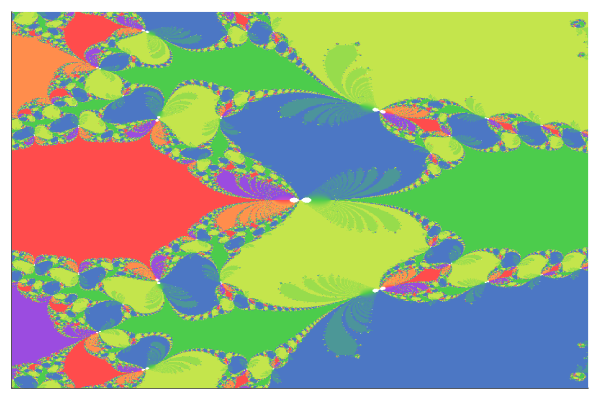

In [23]:
update=get_map(h11)
plot_Fr(-2-2im,2+2im,update)

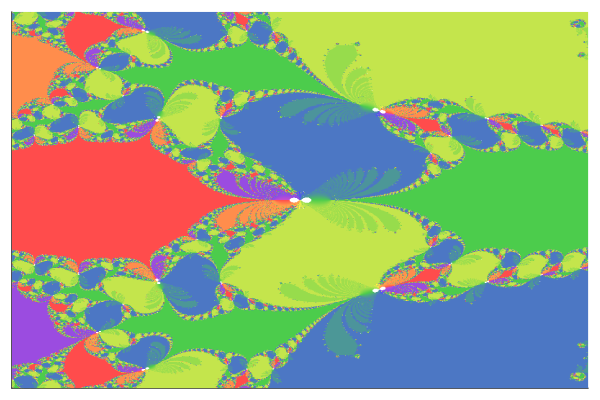

In [24]:
update=get_map(h12)
plot_Fr(-2-2im,2+2im,update)

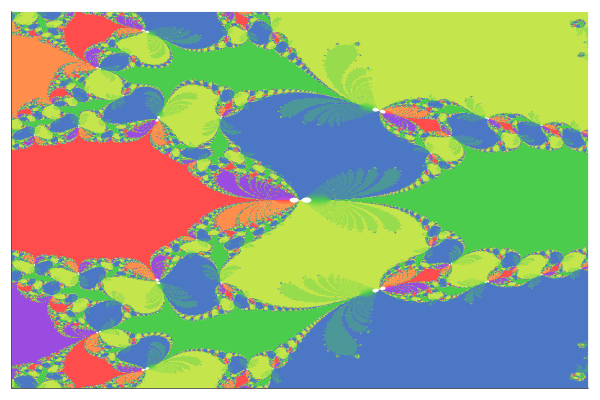

In [25]:
update=get_map(h13)
plot_Fr(-2-2im,2+2im,update)

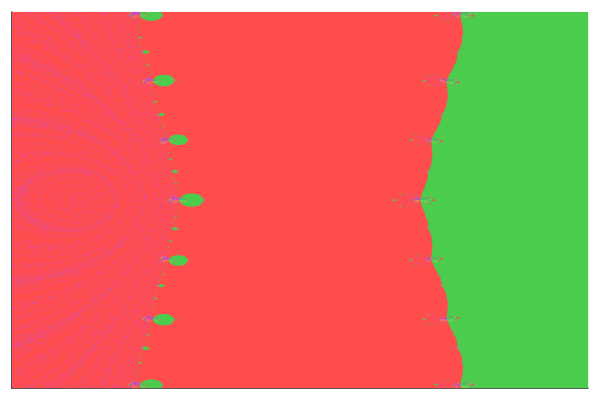

In [26]:
update=get_map(h21)
plot_Fr(-2.5-2.5im,2.5+2.5im,update)

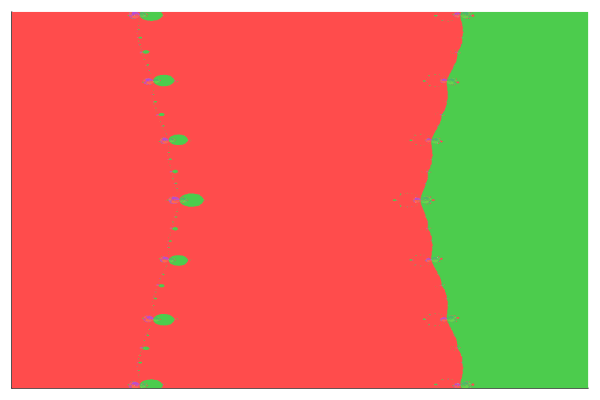

In [27]:
update=get_map(h22)
plot_Fr(-2.5-2.5im,2.5+2.5im,update)

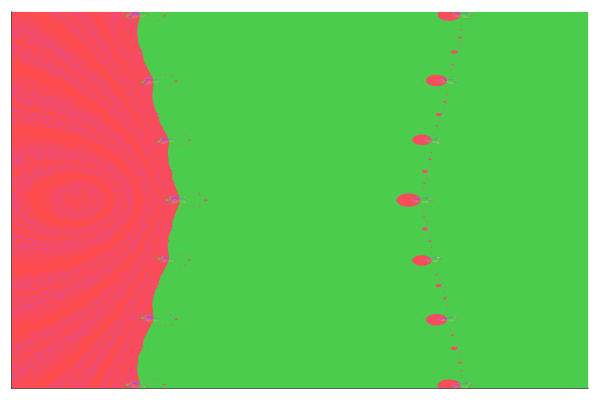

In [28]:
update=get_map(h23)
plot_Fr(-2.5-2.5im,2.5+2.5im,update)

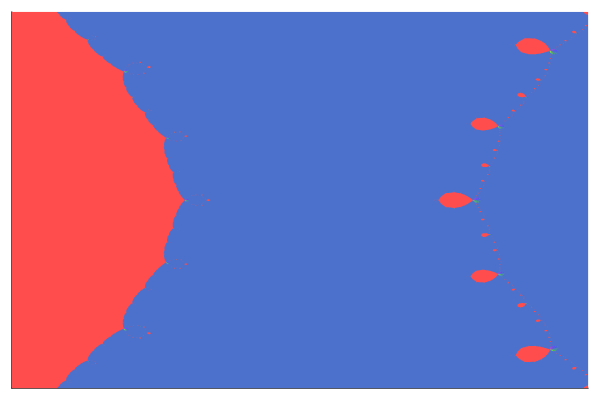

In [29]:
update=get_map(h31)
plot_Fr(-5-5im,5+5im,update)

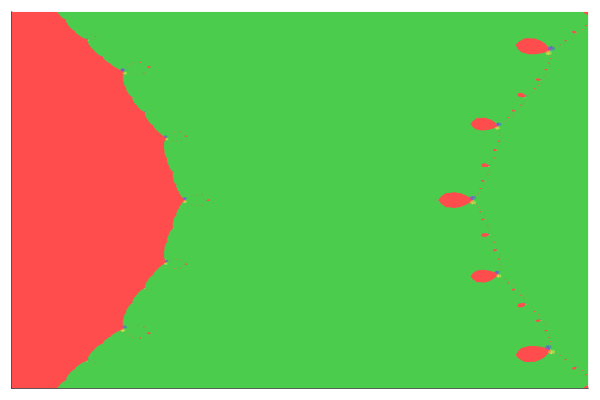

In [30]:
update=get_map(h32)
plot_Fr(-5-5im,5+5im,update)

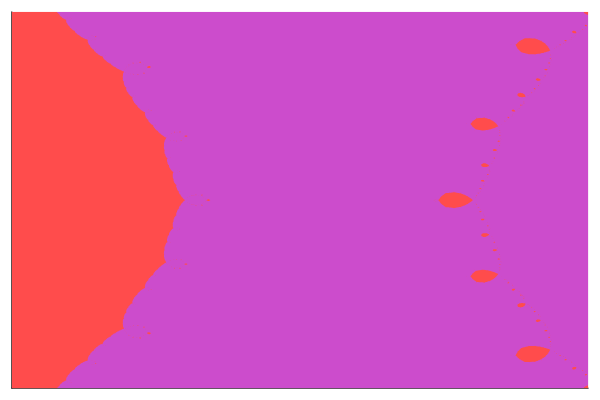

In [31]:
update=get_map(h33)
plot_Fr(-5-5im,5+5im,update)